In [ ]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
apple = pd.read_csv('AAPL.csv')
apple.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800


In [ ]:
#  Check out the type of the columns
apple.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


In [ ]:
# Transform the Date column as a datetime type
apple.Date = pd.to_datetime(apple.Date)

apple['Date'].head()

,Date
0,1980-12-12
1,1980-12-15
2,1980-12-16
3,1980-12-17
4,1980-12-18


In [ ]:
# Set the date as the index
apple = apple.set_index('Date')

apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [ ]:
#  Is there any duplicate dates?
apple.index.is_unique

True

In [ ]:
apple.sort_index(ascending = True).head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [ ]:
# Get the last business day of each month
apple_month = apple.resample('BM').mean()

apple_month.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-31,0.136075,0.136461,0.135903,0.135903,0.106075,1.034501e+08
1981-01-30,0.141768,0.142086,0.141316,0.141316,0.110300,2.899947e+07
1981-02-27,0.118215,0.118627,0.117892,0.117892,0.092017,1.692733e+07
1981-03-31,0.111328,0.111683,0.110871,0.110871,0.086538,3.185076e+07
1981-04-30,0.121811,0.122183,0.121545,0.121545,0.094869,2.556800e+07


In [ ]:
# How many months in the data we have?
apple_months = apple.resample('BM').mean()

len(apple_months.index)

499

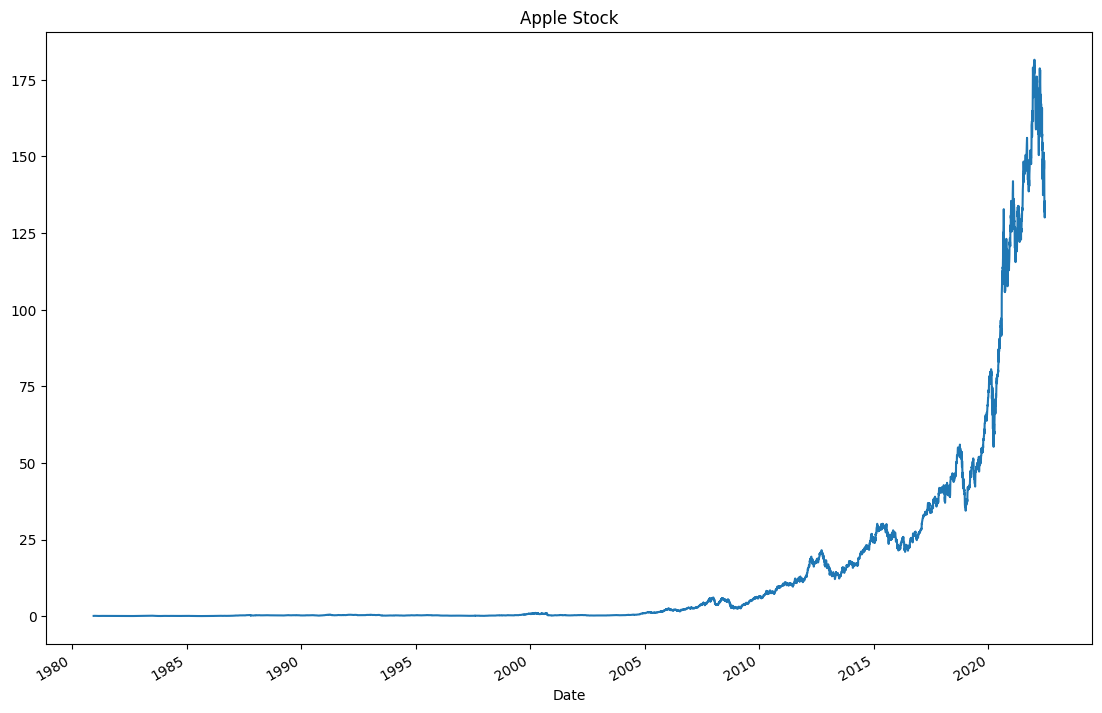

In [ ]:
# makes the plot and assign it to a variable
appl_open = apple['Adj Close'].plot(title = "Apple Stock")

# changes the size of the graph
fig = appl_open.get_figure()
fig.set_size_inches(13.5, 9)